In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing                    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler     
#from sklearn.ensemble import RandomForestClassifier
from keras import Sequential
from keras.layers import Dense

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam


print(tf.__version__)

2.4.0


In [3]:
#read the dataset
#df=pd.read_csv('Reduced Features.csv')
df=pd.read_csv('Reduced Features.csv')

In [4]:
#view of the dataset
df.head()

,"<actionandroid:name=""com.jb.gokeyboard.messagecenter.msgcontentactivity""/>\n","<actionandroid:name=""android.net.wifi.p2p.THIS_DEVICE_CHANGED""/>\n","<actionandroid:name=""com.sonyericsson.extras.liveware.aef.registration.EXTENSION_REGISTER_REQUEST""/>\n","<actionandroid:name=""com.parse.push.intent.OPEN""/>\n","<actionandroid:name=""com.sonyericsson.extras.aef.widget.ONTOUCH""/>\n","<actionandroid:name=""ata.squid.common.link.AtaAccountCommonActivity""/>\n","<actionandroid:name=""at.prefs.widgets_content""/>\n","<actionandroid:name=""android.service.textservice.SpellCheckerService""/>\n","<actionandroid:name=""android.accounts.LOGIN_ACCOUNTS_CHANGED""/>\n","<actionandroid:name=""com.jrtstudio.rating.Set_Rating""/>\n","<actionandroid:name=""com.agilebinary.mobilemonitor.WATCHDOG_ACTION""/>\n","<actionandroid:name=""com.grindrapp.android.intent.chat""/>\n","<actionandroid:name=""android.intent.action.PACKAGE_FIRST_LAUNCH""/>\n","<actionandroid:name=""ata.squid.pimd.relationship.RelationshipRequestsActivity""/>\n","<actionandroid:name=""com.google.android.gms.wallet.ENABLE_WALLET_OPTIMIZATION""/>\n","<actionandroid:name=""com.editor.freight.action""/>\n","<actionandroid:name=""de.ub0r.android.websms.connector.INFO""/>\n","<actionandroid:name=""com.net.action.ForGuide""/>\n","<actionandroid:name=""com.google.zxing.client.android.SCAN""/>\n","<actionandroid:name=""ANDROID.INTENT.ACTION.VIEW""/>\n","<actionandroid:name=""com.centris_mobile.Settings""/>\n","<actionandroid:name=""com.sonyericsson.extras.aef.control.LIST_ITEM_SELECTED""/>\n","<actionandroid:name=""Keep""/>\n","<actionandroid:name=""com.cfinc.launcehr2.THEMES""/>\n","<actionandroid:name=""com.cisco.anyconnect.vpn.android.CONNECTION_SELECTOR_SHOW_INTENT""/>\n","<actionandroid:name=""com.android.kepler.KEPLER_RESTART""/>\n","<actionandroid:name=""com.centris_mobile.CalculatorActivity""/>\n","<actionandroid:name=""ata.squid.pimd.tutorial.TutorialHomeActivity""/>\n","<actionandroid:name=""com.android.ussd.IExtendedNetworkService""/>\n","<actionandroid:name=""ata.squid.common.link.LinkSelectionCommonActivity""/>\n","<actionandroid:name=""android.intent.action.USER_UNLOCKED""/>\n","<actionandroid:name=""android.media.action.STILL_IMAGE_CAMERA""/>\n","<actionandroid:name=""com.charingsaver.state.action""/>\n","<actionandroid:name=""fm.last.android.playbackpaused""/>\n","<actionandroid:name=""android.intent.action.ACTION_EXTERNAL_APPLICATIONS_AVAILABLE""/>\n","<actionandroid:name=""com.mint.broadcast.widget_access""/>\n","<actionandroid:name=""android.view.InputMethod""/>\n","<actionandroid:name=""com.mobisystems.pdf.yotaphone.VIEW""/>\n","<actionandroid:name=""com.baidu.android.pushservice.action.BIND_SYNC""/>\n","<actionandroid:name=""com.snowfish.a.a.s.ABGSvc""/>\n",...,com.mico.permission.C2D_MESSAGE\n,optional-name=android.permission.ACCESS_COARSE_LOCATION\n,android.permission.READ_SYNC_SETTINGS\n,htc.socialmanager.permission.USE_SOCIALSERVICE\n,android.permission.BLUETOOTH_ADMIN\n,com.dotc.ime.latin.flash.permission.C2D_MESSAGE\n,com.google.android.launcher.permission.WRITE_SETTINGS\n,android.permission.WRITE_EXTERNAL_STORAGE\n,android.permission.READ_SMS\n,br.com.dafiti.permission.C2D_MESSAGE\n,.gcm.permission.C2D_MESSAGE\n,android.permission.CHANGE_NETWORK_STATE\n,android.permission.FLASH_LIGHT\n,android.permission.WRITE_SYNC_SETTINGS\n,android.permission.CHANGE_WIFI_STATE\n,android.permission.WRITE_APN_SETTINGS\n,.permission.MAPS_RECIEVE\n,android.permission.ACCESS_CORSE_LOCATION\n,android.permission.INTERNET\n,android.permission.BROADCAST_PACKAGE_INSTALL\n,android.permission.READ_APP_BADGE\n,android.permission.CALL_PRIVILEGED\n,.WRITE_EXTERNAL_STORAGE\n,android.permission.WRITE_SECURE\n,android.permission.SEND_SMS\n,com.sonymobile.home.permission.PROVIDER_INSERT_BADGE\n,com.yotadevices.framework.permission.ACCESS_BACKSCREEN\n,com.teslacoilsw.launcher.permission.WRITE_SETTINGS\n,android.permission.INSTALL_PACKAGES\n,android.permission.SUBSCRIBED_FEEDS_WRITE\n,andr

In [5]:
#no of rows and columns
df.shape

(954, 1029)

In [6]:
#checking missing values
df.isna().sum()

<actionandroid:name="com.jb.gokeyboard.messagecenter.msgcontentactivity"/>\n                              0
<actionandroid:name="android.net.wifi.p2p.THIS_DEVICE_CHANGED"/>\n                                        0
<actionandroid:name="com.sonyericsson.extras.liveware.aef.registration.EXTENSION_REGISTER_REQUEST"/>\n    0
<actionandroid:name="com.parse.push.intent.OPEN"/>\n                                                      0
<actionandroid:name="com.sonyericsson.extras.aef.widget.ONTOUCH"/>\n                                      0
                                                                                                         ..
android.permission.FORCE_STOP_PACKAGES\n                                                                  0
family                                                                                                    0
cat                                                                                                       0
MD5                         

In [7]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Columns: 1029 entries, <actionandroid:name="com.jb.gokeyboard.messagecenter.msgcontentactivity"/>
 to Binary_Type
dtypes: int64(1026), object(3)
memory usage: 7.5+ MB


In [8]:
df.select_dtypes(include=['object'])

,family,cat,MD5
0,ewind,Adware,0054d35c7bc28a76d79e6ba7887c341f
1,ewind,Adware,03e8e080616cc50e06ddfea24aed0623
2,ewind,Adware,1de012d8de8b0be0d0b27da1a0c03f52
3,ewind,Adware,1e680e1a75f5508f48f56b85bbc254fe
4,ewind,Adware,1e87d0abe94a38b5e305ac6371b4190f
...,...,...,...
949,smssniffer,SMS,0eee13df20ee4ad1f60305dacc661873
950,smssniffer,SMS,6bfad4df4b512260973a54753b1494ef
951,smssniffer,SMS,82fb2b41e1e0155c50d2a2c850180cc4
952,smssniffer,SMS,a1593777ac80b828d2d520d24809829d


In [9]:
# statistical information of the datset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"<actionandroid:name=""com.jb.gokeyboard.messagecenter.msgcontentactivity""/>\n",954.0,0.002096,0.045763,0.0,0.0,0.0,0.0,1.0
"<actionandroid:name=""android.net.wifi.p2p.THIS_DEVICE_CHANGED""/>\n",954.0,0.005241,0.072243,0.0,0.0,0.0,0.0,1.0
"<actionandroid:name=""com.sonyericsson.extras.liveware.aef.registration.EXTENSION_REGISTER_REQUEST""/>\n",954.0,0.004193,0.064650,0.0,0.0,0.0,0.0,1.0
"<actionandroid:name=""com.parse.push.intent.OPEN""/>\n",954.0,0.018868,0.136130,0.0,0.0,0.0,0.0,1.0
"<actionandroid:name=""com.sonyericsson.extras.aef.widget.ONTOUCH""/>\n",954.0,0.004193,0.064650,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
android.permission.SET_PREFERRED_APPLICATIONS\n,954.0,0.004193,0.064650,0.0,0.0,0.0,0.0,1.0
android.permission.USES_POLICY_FORCE_LOCK\n,954.0,0.003145,0.056018,0.0,0.0,0.0,0.0,1.0
android.permission.BROADCAST_PACKAGE_REPLACED\n,954.0,0.005241,0.072243,0.0,0.0,0.0,0.0,1.0
android.permission.FORCE_STOP_PACKAGES\n,954.0,0.003145,0.056018,0.0,0.0,0.0,0.0,1.0


In [10]:
df.drop(['MD5','family','cat'], axis=1, inplace=True)
#weights = tf.Variable(np.ones([100,10],dtype='float32'), name=weights)
#value = weights.eval();
#df = pd.get_dummies(df, columns=['cat'])

In [11]:
df.shape

(954, 1026)

In [12]:
#view of the dataset
df.head()

,"<actionandroid:name=""com.jb.gokeyboard.messagecenter.msgcontentactivity""/>\n","<actionandroid:name=""android.net.wifi.p2p.THIS_DEVICE_CHANGED""/>\n","<actionandroid:name=""com.sonyericsson.extras.liveware.aef.registration.EXTENSION_REGISTER_REQUEST""/>\n","<actionandroid:name=""com.parse.push.intent.OPEN""/>\n","<actionandroid:name=""com.sonyericsson.extras.aef.widget.ONTOUCH""/>\n","<actionandroid:name=""ata.squid.common.link.AtaAccountCommonActivity""/>\n","<actionandroid:name=""at.prefs.widgets_content""/>\n","<actionandroid:name=""android.service.textservice.SpellCheckerService""/>\n","<actionandroid:name=""android.accounts.LOGIN_ACCOUNTS_CHANGED""/>\n","<actionandroid:name=""com.jrtstudio.rating.Set_Rating""/>\n","<actionandroid:name=""com.agilebinary.mobilemonitor.WATCHDOG_ACTION""/>\n","<actionandroid:name=""com.grindrapp.android.intent.chat""/>\n","<actionandroid:name=""android.intent.action.PACKAGE_FIRST_LAUNCH""/>\n","<actionandroid:name=""ata.squid.pimd.relationship.RelationshipRequestsActivity""/>\n","<actionandroid:name=""com.google.android.gms.wallet.ENABLE_WALLET_OPTIMIZATION""/>\n","<actionandroid:name=""com.editor.freight.action""/>\n","<actionandroid:name=""de.ub0r.android.websms.connector.INFO""/>\n","<actionandroid:name=""com.net.action.ForGuide""/>\n","<actionandroid:name=""com.google.zxing.client.android.SCAN""/>\n","<actionandroid:name=""ANDROID.INTENT.ACTION.VIEW""/>\n","<actionandroid:name=""com.centris_mobile.Settings""/>\n","<actionandroid:name=""com.sonyericsson.extras.aef.control.LIST_ITEM_SELECTED""/>\n","<actionandroid:name=""Keep""/>\n","<actionandroid:name=""com.cfinc.launcehr2.THEMES""/>\n","<actionandroid:name=""com.cisco.anyconnect.vpn.android.CONNECTION_SELECTOR_SHOW_INTENT""/>\n","<actionandroid:name=""com.android.kepler.KEPLER_RESTART""/>\n","<actionandroid:name=""com.centris_mobile.CalculatorActivity""/>\n","<actionandroid:name=""ata.squid.pimd.tutorial.TutorialHomeActivity""/>\n","<actionandroid:name=""com.android.ussd.IExtendedNetworkService""/>\n","<actionandroid:name=""ata.squid.common.link.LinkSelectionCommonActivity""/>\n","<actionandroid:name=""android.intent.action.USER_UNLOCKED""/>\n","<actionandroid:name=""android.media.action.STILL_IMAGE_CAMERA""/>\n","<actionandroid:name=""com.charingsaver.state.action""/>\n","<actionandroid:name=""fm.last.android.playbackpaused""/>\n","<actionandroid:name=""android.intent.action.ACTION_EXTERNAL_APPLICATIONS_AVAILABLE""/>\n","<actionandroid:name=""com.mint.broadcast.widget_access""/>\n","<actionandroid:name=""android.view.InputMethod""/>\n","<actionandroid:name=""com.mobisystems.pdf.yotaphone.VIEW""/>\n","<actionandroid:name=""com.baidu.android.pushservice.action.BIND_SYNC""/>\n","<actionandroid:name=""com.snowfish.a.a.s.ABGSvc""/>\n",...,com.unity3d.player.permission.C2D_MESSAGE\n,android.permission.SET_DEBUG_APP\n,android.permission.REORDER_TASKS\n,com.mico.permission.C2D_MESSAGE\n,optional-name=android.permission.ACCESS_COARSE_LOCATION\n,android.permission.READ_SYNC_SETTINGS\n,htc.socialmanager.permission.USE_SOCIALSERVICE\n,android.permission.BLUETOOTH_ADMIN\n,com.dotc.ime.latin.flash.permission.C2D_MESSAGE\n,com.google.android.launcher.permission.WRITE_SETTINGS\n,android.permission.WRITE_EXTERNAL_STORAGE\n,android.permission.READ_SMS\n,br.com.dafiti.permission.C2D_MESSAGE\n,.gcm.permission.C2D_MESSAGE\n,android.permission.CHANGE_NETWORK_STATE\n,android.permission.FLASH_LIGHT\n,android.permission.WRITE_SYNC_SETTINGS\n,android.permission.CHANGE_WIFI_STATE\n,android.permission.WRITE_APN_SETTINGS\n,.permission.MAPS_RECIEVE\n,android.permission.ACCESS_CORSE_LOCATION\n,android.permission.INTERNET\n,android.permission.BROADCAST_PACKAGE_INSTALL\n,android.permission.READ_APP_BADGE\n,android.permission.CALL_PRIVILEGED\n,.WRITE_EXTERNAL_STORAGE\n,android.permission.WRITE_SECURE\n,android.permission.SEND_SMS\n,com.sonymobile.home.permission.PROVIDER_INSERT_BADGE\n,com.yotadevices.framework.permission.ACCESS_BACKSCREEN\n,com.teslacoilsw.launcher.

In [13]:
#Divide the data set into training and test sets
X=df.drop(['Binary_Type'], axis=1)
y=df['Binary_Type']

#X=df.drop(['cat'], axis=1)
#y=df['cat']

In [14]:
X.shape


(954, 1025)

In [18]:
# Normalize the train and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
# training test split and test size is 30 while training size is 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [ ]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=1025))
#Second  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [ ]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=100, epochs=40)

Epoch 1/40
7/7 [==============================] - 1s 4ms/step - loss: 0.6603 - accuracy: 0.6594
Epoch 2/40
7/7 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7824
Epoch 3/40
7/7 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8255
Epoch 4/40
7/7 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.8413
Epoch 5/40
7/7 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.9089
Epoch 6/40
7/7 [==============================] - 0s 4ms/step - loss: 0.1996 - accuracy: 0.9322
Epoch 7/40
7/7 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.9252
Epoch 8/40
7/7 [==============================] - 0s 4ms/step - loss: 0.1391 - accuracy: 0.9472
Epoch 9/40
7/7 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 0.9617
Epoch 10/40
7/7 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9655
Epoch 11/40
7/7 [======================

In [ ]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

21/21 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9895


[0.03981289267539978, 0.9895052313804626]

In [ ]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.8)
#epochs=150
#history = classifier.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[216   8]
 [  9  54]]


In [ ]:
print("Accuracy of the model:", accuracy_score(y_test, y_pred)*100)

Accuracy of the model: 94.07665505226481


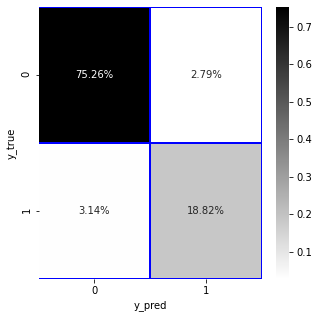

In [ ]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
#sns.heatmap(cm,annot=True,linewidths=0.7,linecolor="red",fmt=".0f",ax=ax)
sns.heatmap(cm/np.sum(cm), annot=True,linewidths=0.7,linecolor="blue",ax=ax ,fmt='.2%', cmap='gist_yarg')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
# classification report of the model
print("classification report:")
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       224
           1       0.87      0.86      0.86        63

    accuracy                           0.94       287
   macro avg       0.92      0.91      0.91       287
weighted avg       0.94      0.94      0.94       287



In [ ]:
X_train.shape, X_test.shape

((667, 1025), (287, 1025))

In [ ]:
X_train = X_train.reshape(667,1025,1)
X_test = X_test.reshape(287, 1025, 1)

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape = (1025,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1024, 64)          192       
_________________________________________________________________
batch_normalization (BatchNo (None, 1024, 64)          256       
_________________________________________________________________
dropout (Dropout)            (None, 1024, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1023, 128)         16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1023, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1023, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 130944)           

In [ ]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
21/21 [==============================] - 9s 366ms/step - loss: 0.9087 - accuracy: 0.6710 - val_loss: 0.7021 - val_accuracy: 0.8362
Epoch 2/50
21/21 [==============================] - 7s 341ms/step - loss: 0.4188 - accuracy: 0.8266 - val_loss: 0.6836 - val_accuracy: 0.8676
Epoch 3/50
21/21 [==============================] - 7s 343ms/step - loss: 0.3344 - accuracy: 0.8631 - val_loss: 0.7024 - val_accuracy: 0.8815
Epoch 4/50
21/21 [==============================] - 7s 342ms/step - loss: 0.2779 - accuracy: 0.8904 - val_loss: 0.7311 - val_accuracy: 0.5679
Epoch 5/50
21/21 [==============================] - 7s 341ms/step - loss: 0.2131 - accuracy: 0.9163 - val_loss: 0.7432 - val_accuracy: 0.5854
Epoch 6/50
21/21 [==============================] - 7s 343ms/step - loss: 0.2373 - accuracy: 0.9073 - val_loss: 0.7578 - val_accuracy: 0.5540
Epoch 7/50
21/21 [==============================] - 7s 343ms/step - loss: 0.2242 - accuracy: 0.9249 - val_loss: 0.7509 - val_accuracy: 0.5889
Epoch 

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqw6agu7e/assets


In [ ]:
history.history

{'accuracy': [0.7286356687545776,
  0.8470764756202698,
  0.8710644841194153,
  0.8905547261238098,
  0.908545732498169,
  0.9010494947433472,
  0.9235382080078125,
  0.9220389723777771,
  0.9295352101325989,
  0.9325337409973145,
  0.9325337409973145,
  0.9280359745025635,
  0.9370315074920654,
  0.9415292143821716,
  0.9490255117416382,
  0.9415292143821716,
  0.9430285096168518,
  0.952023983001709,
  0.9415292143821716,
  0.95652174949646,
  0.9400299787521362,
  0.9550225138664246,
  0.952023983001709,
  0.9460269808769226,
  0.9490255117416382,
  0.9595202207565308,
  0.9610195159912109,
  0.9595202207565308,
  0.9625187516212463,
  0.9610195159912109,
  0.9625187516212463,
  0.9655172228813171,
  0.9625187516212463,
  0.9640179872512817,
  0.95652174949646,
  0.9640179872512817,
  0.9610195159912109,
  0.9610195159912109,
  0.9730135202407837,
  0.9700149893760681,
  0.9610195159912109,
  0.9670165181159973,
  0.9730135202407837,
  0.9580209851264954,
  0.9685157537460327,
  0.9

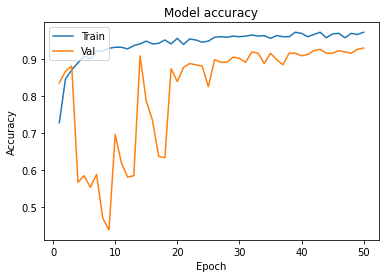

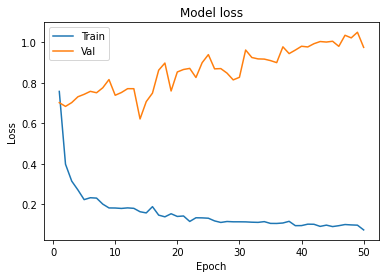

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
print("Accuracy of the model:", accuracy_score(y_test, y_pred)*100)

Accuracy of the model: 94.07665505226481


In [53]:
#import numpy as np
#import tensorflow as tf
from numpy import newaxis

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
print (input_shape)
print(type(X_test))

input_data = np.array(X_test, dtype=np.float32)

#following line was an attempt to convert it array from 2D to 3D.
#input_data = input_data.reshape((input_data, input_data.shape[1], 1))



#for i in range(285):   #for total length
for i in range(5):
  print("Loop iteration: %s" %i)
  input_data2 = input_data[1]
  input_data3 = input_data2[newaxis, :, newaxis]
  print(input_data3)
  #input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data3)
  #interpreter.set_tensor(input_data3)

  interpreter.invoke()

  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
  output_data = interpreter.get_tensor(output_details[0]['index'])
  print(output_data)

[   1 1025    1]
<class 'pandas.core.frame.DataFrame'>
Loop iteration: 0
[[[0.]
  [1.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[[0.99732816]]
Loop iteration: 1
[[[0.]
  [1.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[[0.99732816]]
Loop iteration: 2
[[[0.]
  [1.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[[0.99732816]]
Loop iteration: 3
[[[0.]
  [1.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[[0.99732816]]
Loop iteration: 4
[[[0.]
  [1.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[[0.99732816]]
